# Networkx and Altair

In [11]:
%matplotlib inline
import numpy as np
import networkx as nx
import altair as alt
import nx_altair as nxa

## Create a random network

Let's just create a random network.

In [12]:
# Generate a random graph
G = nx.fast_gnp_random_graph(n = 30, p = 0.25)

# Compute positions for viz.
pos = nx.spring_layout(G)

# Add attributes to each node.
for n in G.nodes():
    G.nodes[n]['weight'] = np.random.randn()
    G.nodes[n]['name'] = np.random.randint(1000)
    G.nodes[n]['viable'] = np.random.choice(['yes', 'no'])
    

# Add attributes to edge.    
for e in G.edges():
    G.edges[(e[0],e[1])]['weight'] = np.random.uniform(1, 10)

## Drawing the graph.

Let's draw the graph using NetworkX.


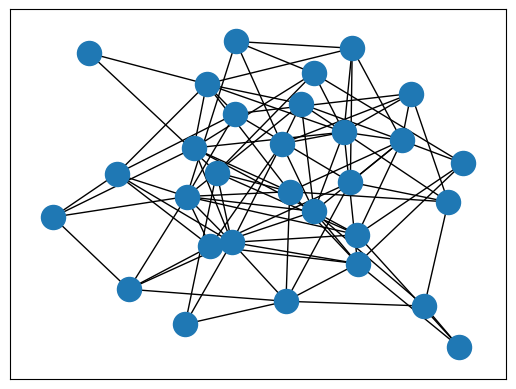

In [13]:
nx.draw_networkx(G = G, pos = pos)

In [14]:
nxa.draw_networkx(G = G, pos = pos)

alt.LayerChart(...)

In [15]:
nxa.draw_networkx(G = G, pos = pos, node_tooltip = ['name', 'weight', 'viable']).interactive()

alt.LayerChart(...)

# Leveraging Altair

In [16]:
chart = nxa.draw_networkx(G = G, pos = pos,
    node_size = 200, node_color = 'viable', cmap = 'viridis', width = 'weight',
    node_tooltip = ['weight', 'name', 'viable']
)

Let's add some advanced exploration features using Altair.

In [17]:
# Get the node layer
edges = chart.layer[0]
nodes = chart.layer[1]

# Build a brush
brush = alt.selection_interval(encodings = ['x', 'y'])
color = alt.Color('viable:N', legend = None)

# Condition nodes based on brush
nodes = nodes.encode(
    fill = alt.condition(brush, color, alt.value('gray')),
).add_params(
    brush
)

# Create a bar graph to show highlighted nodes.
bars = alt.Chart(nodes.data).mark_bar().encode(
    x = alt.X('count()', scale = alt.Scale(domain = (0,20))),
    y = 'viable',
    color = 'viable',
).transform_filter(
    brush
)

alt.vconcat(edges+nodes, bars)

alt.VConcatChart(...)